<a href="https://colab.research.google.com/github/FishchevaKM/MachineLearningHomework/blob/main/FirstLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Грибы(Общее описание)

Каждый вид идентифицируется как съедобный, ядовитый или неизвестной съедобности и не рекомендуется, кроме того присутствуют описательные характеристики:

1.	class - класс
2.	cap shape - форма шляпки
3.	cap surface - поверхность шляпки
4.	cap color - цвет шляпки
5.	bruises - повреждения
6.	odor - запах
7.	gill attachment - жаберное крепление
8.	gill spacing – плотность жабр
9.	gill size – размер жабр
10.	gill color – цвет жабр
11.	stalk shape - форма стебля
12.	stalk root - корень стебля
13.	stalk surface above ring - поверхность стебля над кольцом
14.	stalk surface below ring - поверхность стебля под кольцом
15.	stalk color above ring - цвет стебля над кольцом
16.	stalk color below ring - цвет стебля под кольцом
17.	veil type – тип покрова
18.	veil color – цвет  покрова
19.	ring number – число колец
20.	ring type – тип колец
21.	spore print color – цвет спор
22.	population - популяция
23.	habitat -  ареал


In [50]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

Считываем данные

In [51]:
url = "https://raw.githubusercontent.com/FishchevaKM/MachineLearningHomework/main/MushroomBase.csv"
data = pd.read_csv(url, sep = ";")

Таблица включает описания гипотетических образцов, соответствующих 23 видам гриба семейства Agaricus и Lepiota, взятые из полевого справочника по североамериканским грибам Одюбонского Общества (1981). Каждый вид идентифицирован как определенно съедобный, определенно ядовитый или обладающий неизвестной съедобностью и не рекомендуемый. Этот последний класс был объединен с ядовитым. В Руководстве четко указано, что не существует простого правила определения съедобности гриба;

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одному грибу) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [52]:
data

,Class,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,Stalk-root,Stalk-surface-above-ring,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,NaN,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,NaN,s,k,w,w,p,w,o,e,w,v,l


Вывод первых 5-ти строк

In [53]:
data.head()

,Class,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,Stalk-root,Stalk-surface-above-ring,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


В полученой таблице, например, гриб №3 имеет характеристики:

1.	Class – класс: p(poisonous)
2.	cap shape – форма шляпки: x(convex-)
3.	cap surface - поверхность шляпки: y(scaly)
4.	cap color - цвет шляпки: w(white)
5.	bruises – повреждения: t(true)
6.	odor – запах: p(pungent)
7.	gill attachment - жаберное крепление: f(free)
8.	gill spacing – плотность жабр: c(close)
9.	gill size – размер жабр: n(narrow)
10.	gill color – цвет жабр: n(red)
11.	stalk shape - форма стебля: e(enlarging)
12.	stalk root - корень стебля: e(equal)
13.	stalk surface above ring - поверхность стебля над кольцом: s(smooth)
14.	stalk surface below ring - поверхность стебля под кольцом: s(smooth)
15.	stalk color above ring - цвет стебля над кольцом: w(white)
16.	stalk color below ring - цвет стебля под кольцом: w(white)
17.	veil type – тип покрова: p(partial)
18.	veil color – цвет  покрова: w(white)
19.	ring number – число колец: o(one)
20.	ring type – тип колец: p(pendant)
21.	spore print color – цвет спор: k(black)
22.	population – популяция: s(scattered)
23.	habitat -  ареал: u(urban)


Вывод последних 5-и строк

In [54]:
data.tail()

,Class,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,Stalk-root,Stalk-surface-above-ring,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
8119,e,k,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,NaN,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,NaN,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,o,o,p,o,c,l


In [55]:
data.shape

(8124, 23)

В данной таблице 23 столбца и 8124 строки (23 характеристики, 8124 гриба).

Можно посмотреть имеющиеся названия столбцов с помощью

In [56]:
data.columns

Index(['Class', 'Cap-shape', 'Cap-surface', 'Cap-color', 'Bruises', 'Odor',
       'Gill-attachment', 'Gill-spacing', 'Gill-size', 'Gill-color',
       'Stalk-shape', 'Stalk-root', 'Stalk-surface-above-ring',
       'Stalk-surface-below-ring', 'Stalk-color-above-ring',
       'Stalk-color-below-ring', 'Veil-type', 'Veil-color', 'Ring-number',
       'Ring-type', 'Spore-print-color', 'Population', 'Habitat'],
      dtype='object')

In [57]:
data.index

RangeIndex(start=0, stop=8124, step=1)

Или же посмотреть значение выбранного столбца в конкретной строке таблице.

In [58]:
data.at[8122, 'Odor']

'y'

Вывод выбранного столбца.

In [59]:
data['Odor']

0       p
1       a
2       l
3       p
4       n
       ..
8119    n
8120    n
8121    n
8122    y
8123    n
Name: Odor, Length: 8124, dtype: object

In [60]:
data['Odor'][3]

'p'

Узнаем общую информацию по нашей таблице.

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Class                     8124 non-null   object
 1   Cap-shape                 8124 non-null   object
 2   Cap-surface               8124 non-null   object
 3   Cap-color                 8124 non-null   object
 4   Bruises                   8124 non-null   object
 5   Odor                      8124 non-null   object
 6   Gill-attachment           8124 non-null   object
 7   Gill-spacing              8124 non-null   object
 8   Gill-size                 8124 non-null   object
 9   Gill-color                8124 non-null   object
 10  Stalk-shape               8124 non-null   object
 11  Stalk-root                5644 non-null   object
 12  Stalk-surface-above-ring  8124 non-null   object
 13  Stalk-surface-below-ring  8124 non-null   object
 14  Stalk-color-above-ring  

Вывод первых пяти элементов указанных нами столбцов.

In [62]:
data[['Class', 'Population']].head()

,Class,Population
0,p,s
1,e,n
2,e,n
3,p,s
4,e,a


Выведем основные статистические характеристики данных нашей таблицы.

In [63]:
data.describe()

,Class,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,Stalk-root,Stalk-surface-above-ring,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,5644,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,4,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


где count – количество элементов в каждом столбце; unique – количество уникальных значений в столбце; top – наиболее часто встречающееся значение; freq – количество top значения в столбце.

In [64]:
data.corr

<bound method DataFrame.corr of      Class Cap-shape Cap-surface  ... Spore-print-color Population Habitat
0        p         x           s  ...                 k          s       u
1        e         x           s  ...                 n          n       g
2        e         b           s  ...                 n          n       m
3        p         x           y  ...                 k          s       u
4        e         x           s  ...                 n          a       g
...    ...       ...         ...  ...               ...        ...     ...
8119     e         k           s  ...                 b          c       l
8120     e         x           s  ...                 b          v       l
8121     e         f           s  ...                 b          c       l
8122     p         k           y  ...                 w          v       l
8123     e         x           s  ...                 o          c       l

[8124 rows x 23 columns]>

Проверим элементы на соответствие заданной характеристике.

In [65]:
data['Class'] == 'e'

0       False
1        True
2        True
3       False
4        True
        ...  
8119     True
8120     True
8121     True
8122    False
8123     True
Name: Class, Length: 8124, dtype: bool

Грибы со значением true являются съедобными, а со значением false – несъедобными.

Удалим столбцы, которые никак не помогут нам определить съедобность гриба.

In [66]:
data = data.drop('Bruises', 1)

In [67]:
data = data.drop('Population', 1)

In [68]:
data = data.drop('Habitat', 1)

Готовим данные для дальнейшей работы

## Подготовка данных

Узнаем категорию данных одного столбца.

In [69]:
data['Ring-type'].dtype.name

'object'

Разделим имеющиеся столбцы на категориальные и на числовые.

In [70]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Class', 'Cap-shape', 'Cap-surface', 'Cap-color', 'Odor', 'Gill-attachment', 'Gill-spacing', 'Gill-size', 'Gill-color', 'Stalk-shape', 'Stalk-root', 'Stalk-surface-above-ring', 'Stalk-surface-below-ring', 'Stalk-color-above-ring', 'Stalk-color-below-ring', 'Veil-type', 'Veil-color', 'Ring-number', 'Ring-type', 'Spore-print-color']
[]


В моей таблице все столбцы являются категориальными.

Для каждого столбца определим возможные значения.

In [71]:
for c in categorical_columns:
    print(c, data[c].unique())

Class ['p' 'e']
Cap-shape ['x' 'b' 's' 'f' 'k' 'c']
Cap-surface ['s' 'y' 'f' 'g']
Cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Gill-attachment ['f' 'a']
Gill-spacing ['c' 'w']
Gill-size ['n' 'b']
Gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Stalk-shape ['e' 't']
Stalk-root ['e' 'c' 'b' 'r' nan]
Stalk-surface-above-ring ['s' 'f' 'k' 'y']
Stalk-surface-below-ring ['s' 'f' 'y' 'k']
Stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
Veil-type ['p']
Veil-color ['w' 'n' 'o' 'y']
Ring-number ['o' 't' 'n']
Ring-type ['p' 'e' 'l' 'f' 'n']
Spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']


### Обрабатываем пропущенные значения

In [72]:
data[categorical_columns].count(axis = 0)

Class                       8124
Cap-shape                   8124
Cap-surface                 8124
Cap-color                   8124
Odor                        8124
Gill-attachment             8124
Gill-spacing                8124
Gill-size                   8124
Gill-color                  8124
Stalk-shape                 8124
Stalk-root                  5644
Stalk-surface-above-ring    8124
Stalk-surface-below-ring    8124
Stalk-color-above-ring      8124
Stalk-color-below-ring      8124
Veil-type                   8124
Veil-color                  8124
Ring-number                 8124
Ring-type                   8124
Spore-print-color           8124
dtype: int64

В столбце Stalk-root есть пропущенные значения. Заменим их на самое популярное значение в этом столбце.

In [73]:
data['Stalk-root'].describe().top

'b'

In [74]:
data['Stalk-root'] = data['Stalk-root'].fillna('b')

Еще раз проверим пропущенные значения:

In [75]:
data[categorical_columns].count(axis = 0)

Class                       8124
Cap-shape                   8124
Cap-surface                 8124
Cap-color                   8124
Odor                        8124
Gill-attachment             8124
Gill-spacing                8124
Gill-size                   8124
Gill-color                  8124
Stalk-shape                 8124
Stalk-root                  8124
Stalk-surface-above-ring    8124
Stalk-surface-below-ring    8124
Stalk-color-above-ring      8124
Stalk-color-below-ring      8124
Veil-type                   8124
Veil-color                  8124
Ring-number                 8124
Ring-type                   8124
Spore-print-color           8124
dtype: int64

In [76]:
data.describe

<bound method NDFrame.describe of      Class Cap-shape Cap-surface  ... Ring-number Ring-type Spore-print-color
0        p         x           s  ...           o         p                 k
1        e         x           s  ...           o         p                 n
2        e         b           s  ...           o         p                 n
3        p         x           y  ...           o         p                 k
4        e         x           s  ...           o         e                 n
...    ...       ...         ...  ...         ...       ...               ...
8119     e         k           s  ...           o         p                 b
8120     e         x           s  ...           o         p                 b
8121     e         f           s  ...           o         p                 b
8122     p         k           y  ...           o         e                 w
8123     e         x           s  ...           o         p                 o

[8124 rows x 20 columns]>

In [77]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

### Векторизация

In [78]:
data_describe = data.describe(include = [object])
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Class', 'Gill-attachment', 'Gill-spacing', 'Gill-size', 'Stalk-shape'] ['Cap-shape', 'Cap-surface', 'Cap-color', 'Odor', 'Gill-color', 'Stalk-root', 'Stalk-surface-above-ring', 'Stalk-surface-below-ring', 'Stalk-color-above-ring', 'Stalk-color-below-ring', 'Veil-color', 'Ring-number', 'Ring-type', 'Spore-print-color']


Бинарные столбцы Class, Gill-attachment, Gill-spacing, Gill-size, Stalk-shape.

Столбец Class я не трогаю, т.к. буду предсказывать съедобность гриба. Посмотрим, какие уникальные значения принимает столбец Gill-attachment.

In [79]:
data['Gill-attachment'].unique()

array(['f', 'a'], dtype=object)

In [80]:
data.at[data['Gill-attachment'] == 'f', 'Gill-attachment'] = 0
data.at[data['Gill-attachment'] == 'a', 'Gill-attachment'] = 1
data['Gill-attachment'].describe()

count     8124
unique       2
top          0
freq      7914
Name: Gill-attachment, dtype: int64

Аналогично для других бинарных столбцов.

In [81]:
data['Gill-spacing'].unique()

array(['c', 'w'], dtype=object)

In [82]:
data.at[data['Gill-spacing'] == 'c', 'Gill-spacing'] = 0
data.at[data['Gill-spacing'] == 'w', 'Gill-spacing'] = 1
data['Gill-spacing'].describe()

count     8124
unique       2
top          0
freq      6812
Name: Gill-spacing, dtype: int64

In [83]:
data['Gill-size'].unique()

array(['n', 'b'], dtype=object)

In [84]:
data.at[data['Gill-size'] == 'n', 'Gill-size'] = 0
data.at[data['Gill-size'] == 'b', 'Gill-size'] = 1
data['Gill-size'].describe()

count     8124
unique       2
top          1
freq      5612
Name: Gill-size, dtype: int64

In [85]:
data['Stalk-shape'].unique()

array(['e', 't'], dtype=object)

In [86]:
data.at[data['Stalk-shape'] == 'e', 'Stalk-shape'] = 0
data.at[data['Stalk-shape'] == 't', 'Stalk-shape'] = 1
data['Stalk-shape'].describe()

count     8124
unique       2
top          1
freq      4608
Name: Stalk-shape, dtype: int64


Воспользуемся методом get_dummies для векторизации оставшихся признаков.

In [87]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Cap-shape_b', 'Cap-shape_c', 'Cap-shape_f', 'Cap-shape_k',
       'Cap-shape_s', 'Cap-shape_x', 'Cap-surface_f', 'Cap-surface_g',
       'Cap-surface_s', 'Cap-surface_y', 'Cap-color_b', 'Cap-color_c',
       'Cap-color_e', 'Cap-color_g', 'Cap-color_n', 'Cap-color_p',
       'Cap-color_r', 'Cap-color_u', 'Cap-color_w', 'Cap-color_y', 'Odor_a',
       'Odor_c', 'Odor_f', 'Odor_l', 'Odor_m', 'Odor_n', 'Odor_p', 'Odor_s',
       'Odor_y', 'Gill-color_b', 'Gill-color_e', 'Gill-color_g',
       'Gill-color_h', 'Gill-color_k', 'Gill-color_n', 'Gill-color_o',
       'Gill-color_p', 'Gill-color_r', 'Gill-color_u', 'Gill-color_w',
       'Gill-color_y', 'Stalk-root_b', 'Stalk-root_c', 'Stalk-root_e',
       'Stalk-root_r', 'Stalk-surface-above-ring_f',
       'Stalk-surface-above-ring_k', 'Stalk-surface-above-ring_s',
       'Stalk-surface-above-ring_y', 'Stalk-surface-below-ring_f',
       'Stalk-surface-below-ring_k', 'Stalk-surface-below-ring_s',
       'Stalk-surface-below-ring_y', '

### Соединяем в одну таблицу

In [88]:
data = pd.concat((data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(8124, 97)


In [89]:
data.describe()

,Cap-shape_b,Cap-shape_c,Cap-shape_f,Cap-shape_k,Cap-shape_s,Cap-shape_x,Cap-surface_f,Cap-surface_g,Cap-surface_s,Cap-surface_y,Cap-color_b,Cap-color_c,Cap-color_e,Cap-color_g,Cap-color_n,Cap-color_p,Cap-color_r,Cap-color_u,Cap-color_w,Cap-color_y,Odor_a,Odor_c,Odor_f,Odor_l,Odor_m,Odor_n,Odor_p,Odor_s,Odor_y,Gill-color_b,Gill-color_e,Gill-color_g,Gill-color_h,Gill-color_k,Gill-color_n,Gill-color_o,Gill-color_p,Gill-color_r,Gill-color_u,Gill-color_w,...,Stalk-surface-below-ring_y,Stalk-color-above-ring_b,Stalk-color-above-ring_c,Stalk-color-above-ring_e,Stalk-color-above-ring_g,Stalk-color-above-ring_n,Stalk-color-above-ring_o,Stalk-color-above-ring_p,Stalk-color-above-ring_w,Stalk-color-above-ring_y,Stalk-color-below-ring_b,Stalk-color-below-ring_c,Stalk-color-below-ring_e,Stalk-color-below-ring_g,Stalk-color-below-ring_n,Stalk-color-below-ring_o,Stalk-color-below-ring_p,Stalk-color-below-ring_w,Stalk-color-below-ring_y,Veil-color_n,Veil-color_o,Veil-color_w,Veil-color_y,Ring-number_n,Ring-number_o,Ring-number_t,Ring-type_e,Ring-type_f,Ring-type_l,Ring-type_n,Ring-type_p,Spore-print-color_b,Spore-print-color_h,Spore-print-color_k,Spore-print-color_n,Spore-print-color_o,Spore-print-color_r,Spore-print-color_u,Spore-print-color_w,Spore-print-color_y
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.055638,0.000492,0.387986,0.101920,0.003939,0.450025,0.285574,0.000492,0.314623,0.399311,0.020679,0.005416,0.184638,0.226489,0.281142,0.017725,0.001969,0.001969,0.128016,0.131955,0.049237,0.023634,0.265879,0.049237,0.004431,0.434269,0.031512,0.070901,0.070901,0.212703,0.011817,0.092565,0.090103,0.050222,0.129000,0.007878,0.183653,0.002954,0.060561,0.147957,...,0.034958,0.053176,0.004431,0.011817,0.070901,0.055145,0.023634,0.230428,0.549483,0.000985,0.053176,0.004431,0.011817,0.070901,0.063023,0.023634,0.230428,0.539636,0.002954,0.011817,0.011817,0.975382,0.000985,0.004431,0.921713,0.073855,0.341704,0.005908,0.159527,0.004431,0.488429,0.005908,0.200886,0.230428,0.242245,0.005908,0.008863,0.005908,0.293944,0.005908
std,0.229235,0.022185,0.487321,0.302562,0.062641,0.497527,0.451715,0.022185,0.464394,0.489787,0.142318,0.073399,0.388028,0.418585,0.449584,0.131959,0.044338,0.044338,0.334128,0.338462,0.216375,0.151914,0.441827,0.216375,0.066425,0.495691,0.174706,0.256675,0.256675,0.409245,0.108068,0.289840,0.286347,0.218415,0.335221,0.088413,0.387225,0.054276,0.238539,0.355079,...,0.183685,0.224398,0.066425,0.108068,0.256675,0.228278,0.151914,0.421133,0.497576,0.031367,0.224398,0.066425,0.108068,0.256675,0.243020,0.151914,0.421133,0.498457,0.054276,0.108068,0.108068,0.154969,0.031367,0.066425,0.268639,0.261551,0.474310,0.076644,0.366190,0.066425,0.499897,0.076644,0.400688,0.421133,0.428468,0.076644,0.093729,0.076644,0.455595,0.076644
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

## X и Y


В моей таблице есть характеристика "Class", которая показывает съедобный гриб или нет.

Я буду прогнозировать съедобность по остальным признакам, описывающим внешний вид гриба.

In [90]:
X = data.drop(('Class'), axis = 1)
y = data['Class']
feature_names = X.columns

In [91]:
type(feature_names)

pandas.core.indexes.base.Index

In [92]:
feature_names

Index(['Cap-shape_b', 'Cap-shape_c', 'Cap-shape_f', 'Cap-shape_k',
       'Cap-shape_s', 'Cap-shape_x', 'Cap-surface_f', 'Cap-surface_g',
       'Cap-surface_s', 'Cap-surface_y', 'Cap-color_b', 'Cap-color_c',
       'Cap-color_e', 'Cap-color_g', 'Cap-color_n', 'Cap-color_p',
       'Cap-color_r', 'Cap-color_u', 'Cap-color_w', 'Cap-color_y', 'Odor_a',
       'Odor_c', 'Odor_f', 'Odor_l', 'Odor_m', 'Odor_n', 'Odor_p', 'Odor_s',
       'Odor_y', 'Gill-color_b', 'Gill-color_e', 'Gill-color_g',
       'Gill-color_h', 'Gill-color_k', 'Gill-color_n', 'Gill-color_o',
       'Gill-color_p', 'Gill-color_r', 'Gill-color_u', 'Gill-color_w',
       'Gill-color_y', 'Stalk-root_b', 'Stalk-root_c', 'Stalk-root_e',
       'Stalk-root_r', 'Stalk-surface-above-ring_f',
       'Stalk-surface-above-ring_k', 'Stalk-surface-above-ring_s',
       'Stalk-surface-above-ring_y', 'Stalk-surface-below-ring_f',
       'Stalk-surface-below-ring_k', 'Stalk-surface-below-ring_s',
       'Stalk-surface-below-ring_y', '

In [93]:
print(X.shape)
print(y.shape)
N, d = X.shape

(8124, 96)
(8124,)


In [94]:
type(X)

pandas.core.frame.DataFrame

In [95]:
type(y)

pandas.core.series.Series

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

5686 2438


In [97]:
5686 + 2438

8124

## k**NN**

In [98]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train);

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

In [156]:
print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0020209443321697594
Ошибка на тестовой выборке:  0.006340917568071615


Видим, ошибка на тестовой выборке больше, чем на обучающей. Следовательно, возникло переобучение.

## Подбор параметров

In [102]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.0 5


# Нейронные сети

Решаем задачу классификации (определение съедобности гриба) при помощи нейронных сетей.

Для этого разбиваем данные на обучающую и тестовую выборки

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)
N_test, _ = X_test.shape

Обучаем классификатор

In [104]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (3), solver = 'lbfgs', activation = 'logistic', random_state = 5)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=3, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=5, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Проверяем качество классификатора

In [105]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Ошибка на обучающей выборке: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовой выборке: ", np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке:  0.010655888296895094
Ошибка на тестовой выборке:  0.008205893323386795


Увеличим число скрытых слоев нейронной сети до 2-х

In [106]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (3, 4), solver = 'lbfgs', activation = 'logistic', random_state = 5)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=5, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [107]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Ошибка на обучающей выборке: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовой выборке: ", np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке:  0.011574499356972258
Ошибка на тестовой выборке:  0.009324878776575904


## Подбор гиперпараметров



Подберем оптимальное значение параметра регуляризации alpha

In [108]:
alpha_arr = np.logspace(-1, 0.5, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (3), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 2)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

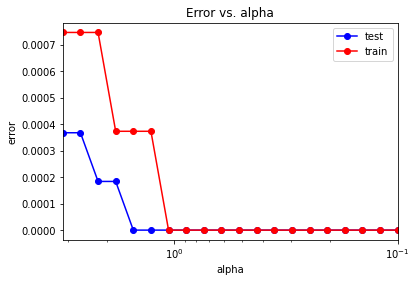

In [109]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [110]:
print(alpha_arr)

[0.1        0.11993539 0.14384499 0.17252105 0.20691381 0.24816289
 0.29763514 0.35696988 0.42813324 0.51348329 0.61584821 0.73861998
 0.88586679 1.06246783 1.27427499 1.52830673 1.83298071 2.19839265
 2.6366509  3.16227766]


Минимальное значение ошибки

In [111]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0


Оптимальное значение alpha

In [112]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

0.1


## Классификатор при найденном оптимальном значении alpha:

Повторим обучение

In [113]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (3),
                          solver = 'lbfgs', activation = 'logistic', random_state = 5)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.0


Матрица рассогласования

In [114]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[1386    0]
 [   0 1295]]


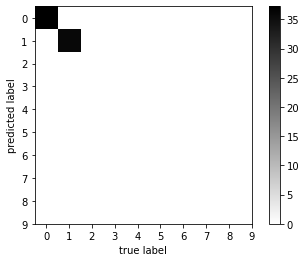

In [115]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

Найдём оптимальное число нейронов

In [116]:
neurons_arr = np.arange(2, 10, 1)
test_err = []
train_err = []
for neurons in neurons_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neurons, neurons), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 5)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

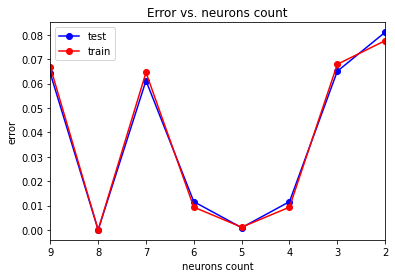

In [117]:
plt.plot(neurons_arr, train_err, 'b-o', label = 'test')
plt.plot(neurons_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(neurons_arr), np.min(neurons_arr)])
plt.title('Error vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('error')
plt.legend()
pass

In [118]:
neurons_opt = neurons_arr[test_err == min_test_err]
print(neurons_opt)

[8]


# Random forests

Разобьем данные на обучающую и тестовую выборки, 33% пойдет в тестовую.

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

Обучаем классификатор Random Forests. Число деревьев = 2.

In [120]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 2)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Проверим качество классификатора по величине ошибки на тестовой и обучающей выборках.

In [121]:
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.00036744442403086535
Ошибка на тестовой выборке:  0.0007459903021260724


Получила переобучение. Построим график зависимости ошибки на тестовой и обучающей выборках, а также oob-ошибки от количества деревьев.

In [122]:
tree_arr = np.arange(5, 20, 1)
test_err = []
train_err = []
oob_err = []

for tree in tree_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = tree, oob_score = True)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - rf.oob_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

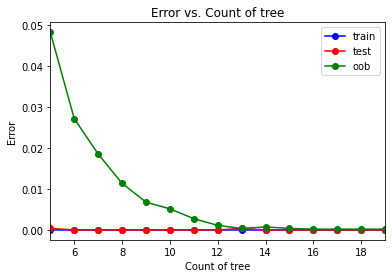

In [123]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

Получила переобучение при 13 деревьях. Минимум oob-ошибки при 18.

Минимальные значения ошибок на обучающей и тестовой выборке:

In [124]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.0
Минимальная ошибка на тестовой выборке:  0.0


Оптимальное количество деревьев:

In [125]:
tree_opt = tree_arr[test_err == min_test_err]
print(tree_opt)

[ 6  7  8  9 10 11 12 14 15 16 17 18 19]


# Extremely Randomized Trees

Обучаем классификатор Extremely Randomized Trees. Число деревьев = 2.

In [126]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 2)
ert.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [127]:
err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.0007459903021260724


Получила переобучение.

Построим график зависимости ошибки на тестовой и обучающей выборках, а также oob-ошибки от количества деревьев.

In [128]:
tree_arr = np.arange(5, 20, 1)
test_err = []
train_err = []
oob_err = []
for tree in tree_arr:
    ert = ensemble.ExtraTreesClassifier(n_estimators = tree, oob_score=True, bootstrap=True)
    ert.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_train)))
    test_err.append(np.mean(y_test  != ert.predict(X_test)))
    oob_err.append(1 - ert.oob_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

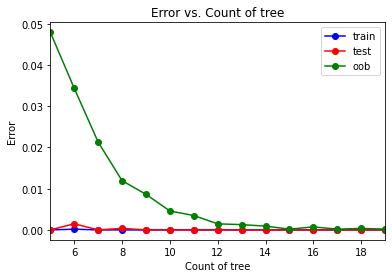

In [129]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

Получила переобучение при количестве деревьев равном 12.

Минимальные значения ошибок на обучающей и тестовой выборке:

In [130]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.0
Минимальная ошибка на тестовой выборке:  0.0


Оптимальное число деревьев равно:

In [131]:
tree_opt = tree_arr[test_err == min_test_err]
print(tree_opt)

[ 5  7  9 10 11 12 13 14 15 16 17 18 19]


# AdaBoost

Обучаем классификатор вида Ada Boost. Число классификаторов = 2.

In [132]:
ab = ensemble.AdaBoostClassifier(n_estimators = 2)
ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=2, random_state=None)

In [133]:
err_train = np.mean(y_train != ab.predict(X_train))
err_test  = np.mean(y_test  != ab.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.06264927429726254
Ошибка на тестовой выборке:  0.06229019022752704


In [134]:
estimator_arr = np.arange(1, 20, 1)
test_err = []
train_err = []
for estimator in estimator_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators = estimator)
    ab.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ab.predict(X_train)))
    test_err.append(np.mean(y_test  != ab.predict(X_test)))

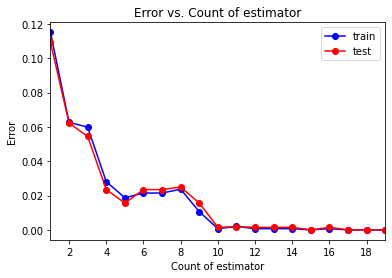

In [135]:
plt.plot(estimator_arr, train_err, 'b-o', label = 'train')
plt.plot(estimator_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(estimator_arr), np.max(estimator_arr)])
plt.title('Error vs. Count of estimator')
plt.xlabel('Count of estimator')
plt.ylabel('Error')
plt.legend()
pass

Получила переобучение на отрезкaх [5, 10], [11, 15) и (15, 17).

Минимальные значения ошибок на обучающей и тестовой выборке:

In [136]:
print(estimator_arr)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [137]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0


Оптимальное количество классификаторов:

In [138]:
estimator_opt = estimator_arr[test_err == min_test_err]
print(estimator_opt)

[15 17 18 19]


# Gradient boosted trees

Обучаем Gradient boosted trees классификатор с количеством деревьев равным 2.

In [139]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 2)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=2,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [140]:
err_train = np.mean(y_train != gbt.predict(X_train))
err_test  = np.mean(y_test  != gbt.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.015616388021311777
Ошибка на тестовой выборке:  0.013054830287206266


Построим график зависимости ошибки на тестовой и обучающей выборках от количества деревьев.

In [141]:
tree_arr = np.arange(1, 50, 3)
test_err = []
train_err = []
for tree in tree_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = tree)
    gbt.fit(X_train, y_train)
    
    y_train_pred = gbt.predict(X_train)
    y_test_pred = gbt.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

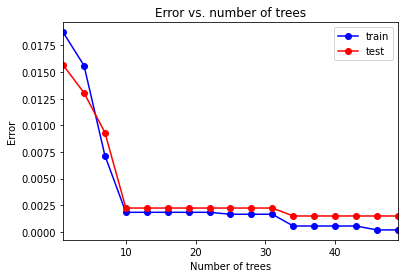

In [142]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()
pass

Минимальные значения ошибок на обучающей и тестовой выборке:

In [143]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.00018372221201543268
Минимальная ошибка на тестовой выборке:  0.0014919806042521448


Оптимальное количество деревьев:

In [144]:
trees_opt = tree_arr[test_err == min_test_err]
print(trees_opt)

[34 37 40 43 46 49]


# Principal Components Analysis

Решаем задачу предсказания съедобности гриба.

Попытаемся уменьшить размерность исходных данных при помощи метода PCA (principal component analysis) с количеством компонент, равным 15:

In [145]:
X.shape

(8124, 96)

In [146]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 15)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [147]:
pca_x = pca.transform(X)

In [148]:
pca_x.shape

(8124, 15)

Разбиваем данные после применения PCA на обучающую и тестовую выборки. Тестовая выборка содержит 33% данных.



In [149]:
X_train, X_test, y_train, y_test = train_test_split(pca_x, y, test_size = 0.33, random_state = 5)

Ошибку, полученную после уменьшения размерности данных сравним с ошибкой, которая была получена до применения PCA на примере двух классификаторов, Random Forest

In [150]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 2)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Проверим качество классификатора по величине ошибки на тестовой и обучающей выборках.

In [151]:
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.0020209443321697594
Ошибка на тестовой выборке:  0.006340917568071615


После использования PCA ошибки на обучающей и тестовой выборках возросли. Наблюдается переобучение.

In [152]:
components_arr = np.arange(1, 16, 1)
test_err = []
train_err = []
oob_err = []
for number in components_arr:
    pca = PCA(n_components = number)
    pca.fit(X)
    pca_x = pca.transform(X)
    pca_x_train, pca_x_test, y_train, y_test = train_test_split(pca_x, y, test_size = 0.33, random_state = 5)
    rf = ensemble.RandomForestClassifier(n_estimators = 2, oob_score = True)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - rf.oob_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

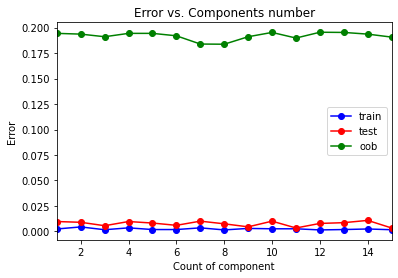

In [153]:
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.plot(components_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(components_arr), np.max(components_arr)])
plt.title('Error vs. Components number')
plt.xlabel('Count of component')
plt.ylabel('Error')
plt.legend()
pass

Получили график зависимости ошибок от количества компонент.

In [154]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.0014697776961234614
Минимальная ошибка на тестовой выборке:  0.0033569563595673255


In [155]:
opt_components_num = components_arr[test_err == min_test_err]
print(opt_components_num)

[11 15]


Оптимальное количество компонент.